In [1]:
#importando as libs
import pandas as pd
import numpy as np
import math
import seaborn as sns
from matplotlib import pyplot as plt

#lendo o dataset
autism_data = pd.read_csv("Autism_Data.csv")

#testando pra ver se está tudo certo
autism_data.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,United States,no,6,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,United States,no,6,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Egypt,no,2,18 and more,?,NO


In [2]:
#verificando se há valores faltosos
autism_data.isnull().sum()

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jundice            0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

In [ ]:
#identificando a quantidade de valores duplicados
autism_data.duplicated().sum()

In [ ]:
#removendo valores duplicados
autism_data = autism_data.drop_duplicates(keep='last')

In [ ]:
#para a regressão vamos avaliar apenas o AQ10 em relação ao resultado do teste
#retirando o restante das colunas
autism_data = autism_data.drop(autism_data.columns[10:20], axis=1) 

In [14]:
#para correlacionar é preciso que todas as variaveis sejam numericas
autism_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 0 to 703
Data columns (total 11 columns):
A1_Score     699 non-null int64
A2_Score     699 non-null int64
A3_Score     699 non-null int64
A4_Score     699 non-null int64
A5_Score     699 non-null int64
A6_Score     699 non-null int64
A7_Score     699 non-null int64
A8_Score     699 non-null int64
A9_Score     699 non-null int64
A10_Score    699 non-null int64
Class/ASD    699 non-null object
dtypes: int64(10), object(1)
memory usage: 65.5+ KB


In [8]:
#renomeando a coluna com o resultado do teste
autism_data = autism_data.rename(columns={'Class/ASD': 'has_autism'})

In [9]:
#transformando os resultados em 1 para YES e em 0 para NO
autism_data["has_autism"] = autism_data["has_autism"].replace("YES", 1)
autism_data["has_autism"] = autism_data["has_autism"].replace("NO", 0)

In [ ]:
#alterando o valor de 'object' para 'int'
autism_data['has_autism'].astype(str).astype(int)

In [65]:
#todos os dados prontos
autism_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 0 to 703
Data columns (total 11 columns):
A1_Score      699 non-null int64
A2_Score      699 non-null int64
A3_Score      699 non-null int64
A4_Score      699 non-null int64
A5_Score      699 non-null int64
A6_Score      699 non-null int64
A7_Score      699 non-null int64
A8_Score      699 non-null int64
A9_Score      699 non-null int64
A10_Score     699 non-null int64
has_autism    699 non-null int64
dtypes: int64(11)
memory usage: 65.5 KB


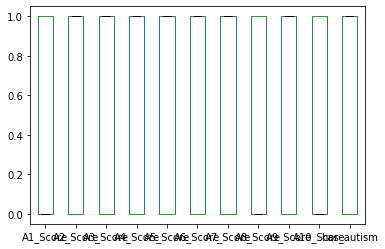

In [10]:
#plotando gráficos para a identificação de outliers
autism_data.plot(kind='box')
plt.show()

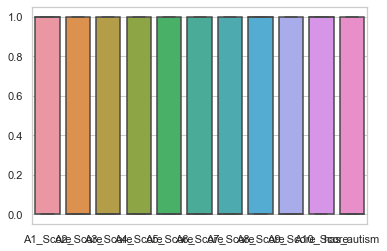

In [11]:
#plotando gráficos para a identificação de outliers
%matplotlib inline

sns.set(style="whitegrid", color_codes=True)
sns.boxplot(data=autism_data)

In [20]:
#correlação de uma variavel para todas as outras
autism_data.corr().style.format("{:.2}").background_gradient(cmap = plt.get_cmap('coolwarm'),axis=1)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,has_autism
A1_Score,1.0,0.0085,0.071,0.13,0.17,0.11,0.22,0.14,0.15,0.12,0.3
A2_Score,0.0085,1.0,0.22,0.16,0.15,0.18,-0.042,0.032,0.2,0.069,0.31
A3_Score,0.071,0.22,1.0,0.41,0.27,0.27,0.079,0.014,0.31,0.17,0.44
A4_Score,0.13,0.16,0.41,1.0,0.31,0.29,0.15,0.0097,0.32,0.21,0.47
A5_Score,0.17,0.15,0.27,0.31,1.0,0.39,0.24,0.099,0.4,0.27,0.54
A6_Score,0.11,0.18,0.27,0.29,0.39,1.0,0.17,0.099,0.48,0.29,0.59
A7_Score,0.22,-0.042,0.079,0.15,0.24,0.17,1.0,0.084,0.19,0.25,0.35
A8_Score,0.14,0.032,0.014,0.0097,0.099,0.099,0.084,1.0,0.1,0.1,0.24
A9_Score,0.15,0.2,0.31,0.32,0.4,0.48,0.19,0.1,1.0,0.28,0.63
A10_Score,0.12,0.069,0.17,0.21,0.27,0.29,0.25,0.1,0.28,1.0,0.38


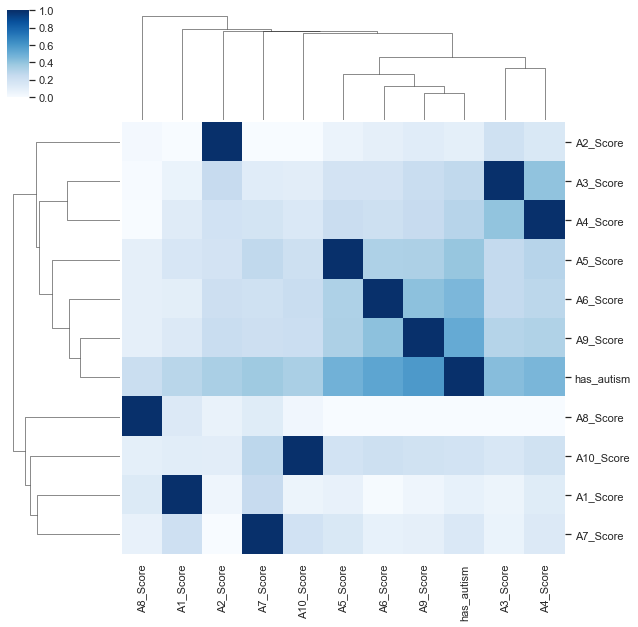

In [34]:
#o gráfico demonstra o grau de relacionamento entre as variáveis
sns.clustermap(autism_data.corr(), metric="correlation", method="single", cmap="Blues", standard_scale=1)

In [ ]:
#'has_autism' tem forte relação com 'A9_Score'
#em seguida de A6_Score e A5_Score juntamente com A4_Score

In [161]:
#gerando bases através da redução de dimensionalidade via PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2, whiten=True)
cols = list(autism_data.columns)

dados_pca = pca.fit_transform(autism_data[cols].values)

dados_pca_v1 = pd.DataFrame(dados_pca, columns=['has_autism', 'A9_Score'])
dados_pca_v2 = pd.DataFrame(dados_pca, columns=['has_autism', 'A6_Score'])
dados_pca_v3 = pd.DataFrame(dados_pca, columns=['has_autism', 'A5_Score'])
dados_pca_v4 = pd.DataFrame(dados_pca, columns=['has_autism', 'A4_Score'])

#dados_pca_v2['A9_Score'] = dados_pca_v1['A9_Score']
#
#dados_pca_v3['A9_Score'] = dados_pca_v2['A9_Score']
#dados_pca_v3['A6_Score'] = dados_pca_v2['A6_Score']
#
#dados_pca_v4['A9_Score'] = dados_pca_v3['A9_Score']
#dados_pca_v4['A6_Score'] = dados_pca_v3['A6_Score']
#dados_pca_v4['A5_Score'] = dados_pca_v3['A5_Score']

In [156]:
dados_pca_v1.head()

,has_autism,A9_Score
0,-0.015214,0.480715
1,-0.300425,0.256824
2,1.255305,-0.804724
3,-0.052264,-0.705599
4,-1.209433,-0.570592


In [157]:
dados_pca_v2.head()

,has_autism,A6_Score
0,-0.015214,0.480715
1,-0.300425,0.256824
2,1.255305,-0.804724
3,-0.052264,-0.705599
4,-1.209433,-0.570592


In [158]:
dados_pca_v3.head()

,has_autism,A5_Score
0,-0.015214,0.480715
1,-0.300425,0.256824
2,1.255305,-0.804724
3,-0.052264,-0.705599
4,-1.209433,-0.570592


In [159]:
dados_pca_v4.head()

,has_autism,A4_Score
0,-0.015214,0.480715
1,-0.300425,0.256824
2,1.255305,-0.804724
3,-0.052264,-0.705599
4,-1.209433,-0.570592


In [145]:
# utilizando todos os 11 parâmetros para ajustar um modelo de regressão linear
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
X = autism_data.drop('has_autism', axis = 1)
summary_01 = X.describe()
lm.fit(X, autism_data.has_autism)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [138]:
#como pode ser visto no quadro de dados, há uma alta correlação entre A9_Score e has_autism.
#permite traçar um gráfico de dispersão entre os dados.

pd.DataFrame(zip(X.columns, lm.coef_), columns = ['features', 'coeficientes estimados'])


,features,coeficientes estimados
0,A9_Score,0.598571


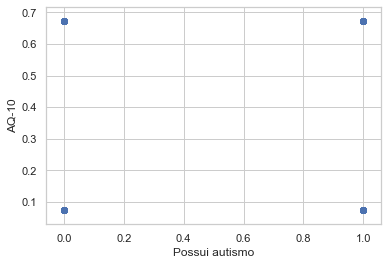

In [139]:
#pode ser visto a relação de 
plt.scatter(autism_data.has_autism, lm.predict(X))
plt.xlabel("Possui autismo")
plt.ylabel("AQ-10")
plt.show()

In [140]:
#regressão para os Scores A9 e A6
X = autism_data.drop(['has_autism','A1_Score','A2_Score','A3_Score','A4_Score','A5_Score','A7_Score','A8_Score','A10_Score'], axis = 1)
summary_02 = X.describe()
lm.fit(X, autism_data.has_autism)

pd.DataFrame(zip(X.columns, lm.coef_), columns = ['features', 'coeficientes estimados'])


,features,coeficientes estimados
0,A6_Score,0.365281
1,A9_Score,0.431413


In [141]:
#regressão apenas para o A9
X = autism_data.drop(['has_autism','A1_Score','A2_Score','A3_Score','A4_Score','A5_Score','A6_Score','A7_Score','A8_Score','A10_Score'], axis = 1)
summary_03 = X.describe()
lm.fit(X, autism_data.has_autism)

pd.DataFrame(zip(X.columns, lm.coef_), columns = ['features', 'coeficientes estimados'])

,features,coeficientes estimados
0,A9_Score,0.598571


In [147]:
summary_01 = summary_01.transpose()
summary_01

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,0.719599,0.450644,0.454936,0.496423,0.496423,0.283262,0.416309,0.646638,0.323319,0.575107
std,0.449517,0.497914,0.498322,0.500345,0.500345,0.450905,0.493299,0.478356,0.468078,0.494681
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [148]:
summary_02 = summary_02.transpose()
summary_02

,A6_Score,A9_Score
count,699.000000,699.000000
mean,0.283262,0.323319
std,0.450905,0.468078
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [149]:
summary_03 = summary_03.transpose()
summary_03

,A9_Score
count,699.000000
mean,0.323319
std,0.468078
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [ ]:
# Aparentemente o melhoramento mais significativo para o modelo de regressão é adicionando as variaveis:
# A9_Score, A6_Score, A5_Score e A4_Score
# pode-se propor um novo teste mas ponderando o valor das repostas, um AQ10 ponderado

# Ou então escrever que o modelo com x/10 variaveis explica y% do resultado.

In [ ]:
correlacao geral
identificar atributoa para retirar por PCA
 